# K Nearest Neighbors

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## DataSet/s

In [2]:
# Load Dataset
# Preview Dataset

df = pd.read_csv('Classified Data', index_col = 0)
df.sample(5)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
289,0.861841,1.393343,1.078968,1.036510,1.113844,0.834736,1.273052,1.520986,0.908510,1.651151,0
783,0.724089,0.948056,0.585212,0.671069,0.951400,0.540724,0.676808,0.686228,1.418996,1.221743,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
985,1.150205,0.726369,0.858908,0.750856,0.639816,0.495082,0.816259,0.472181,1.263450,1.232706,1
548,1.125611,1.340628,0.765846,0.486345,1.521747,1.256347,1.143866,1.140271,0.780668,1.350872,0


## Data Scaling

In [3]:
# Import Standard Scaler

from sklearn.preprocessing import StandardScaler

In [4]:
# Standard Scaling Instances
# You do not need the target class at this point (scaling)

scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS', axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [5]:
# Transform the Data (Scaled Features)

scaled_features = scaler.transform(df.drop('TARGET CLASS', axis = 1))
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [6]:
df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1]) # excluding the last column (:-1)
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## Train - Test Split

In [7]:
# Import

from sklearn.model_selection import train_test_split

In [8]:
# Splits
X = df_feat
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [9]:
# Show some features X_train

X_train.head(5)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
290,-0.865812,-0.426085,-0.098704,-0.358143,-0.090834,-1.445613,0.943619,-0.711715,-1.416361,1.335201
167,-0.289633,0.427599,-0.324566,-0.291304,-1.047206,-0.847424,0.309935,-2.102427,-1.071680,0.809926
486,-1.628411,0.840546,1.164633,-0.985219,0.346949,-0.064661,1.008390,-0.184080,0.865138,-0.630975
683,-0.576123,-0.157888,0.102529,1.176857,-2.475351,-0.599677,-0.249565,0.262795,0.598726,1.376306
876,0.059207,1.006760,1.932615,2.225987,-0.570004,0.634646,2.427879,1.136821,0.104758,-0.175808


In [10]:
# Show some features X_test

y_train.head(5)

290    0
167    1
486    0
683    1
876    0
Name: TARGET CLASS, dtype: int64

## KNN

In [11]:
# Import

from sklearn.neighbors import KNeighborsClassifier

In [12]:
# Instance of KNN

model = KNeighborsClassifier(n_neighbors = 1) # 1? # 2? 3?

In [13]:
# Fit

model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [14]:
# Predictions

predictions = model.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0])

## Evaluation Metrics

In [15]:
# Import

from sklearn.metrics import classification_report, confusion_matrix

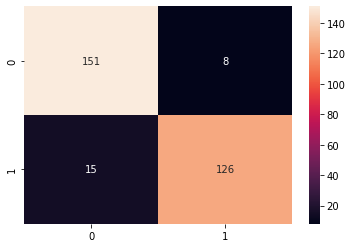

In [16]:
# Confusion Matrix via Heat Map

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True, fmt = 'g')

In [17]:
# Classification Report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



## Elbow Method for Selecting Optimized K Values

In [18]:
# Iterate through error_rates

error_rate = []

for i in range(1, 40):

  model = KNeighborsClassifier(n_neighbors  = i)

  model.fit(X_train, y_train)
  pred_i = model.predict(X_test)
  
  error_rate.append(np.mean(pred_i != y_test))

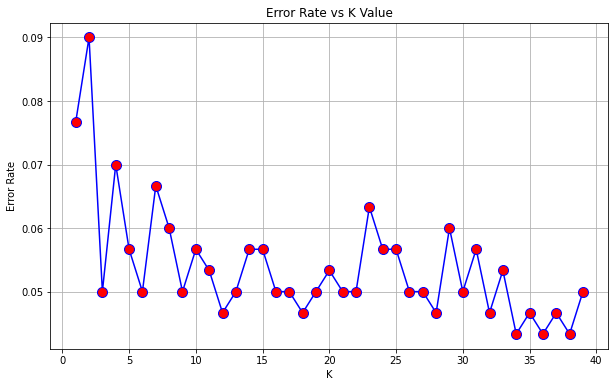

In [19]:
# Plot Graph

plt.figure(figsize = (10,6))
plt.plot(range(1,40), error_rate, color = 'b', linestyle = '-', marker = 'o', markerfacecolor = 'r', markersize = 10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

## Re-model with new values

In [20]:
# Re-Model

new_model = KNeighborsClassifier(n_neighbors = 17)
new_model.fit(X_train, y_train)
predictions = new_model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[153   6]
 [  9 132]]


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       159
           1       0.96      0.94      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



## Sample Decision Boundaries

In [21]:
from mlxtend.plotting import plot_decision_regions

In [91]:
# Function

def knn_plots(X, y):

  features = X[['WTT','PTI']].values
  target = y.values

  new_model = KNeighborsClassifier(n_neighbors = 17)
  new_model.fit(features, target)

  plt.figure(figsize = (7,7))
  plot_decision_regions(features, target, clf = new_model, legend = 2)

  plt.xlabel('WTT')
  plt.ylabel('PTI')
  plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


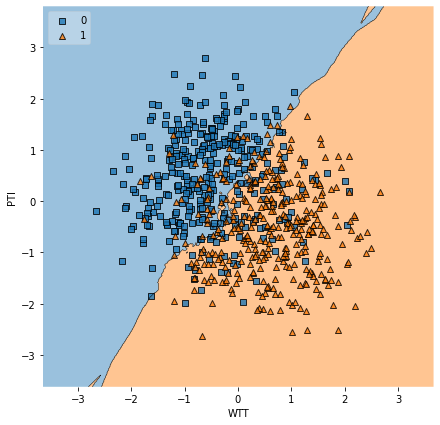

In [92]:
# Execute Function

knn_plots(X_train, y_train)